# Módulo de Matemáticas 101: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica se centra en la regresión lineal (¡tema muy importante!) y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

## 1. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a un dataset concreto

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y,$</center>

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 1.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [1]:
!pip install ucimlrepo

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ----------- ---------------------------- 3.1/11.0 MB 16.4 MB/s eta 0:00:01
   ------------------- -------------------- 5.2/11.0 MB 12.6 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.0 MB 13.2 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 13.4 MB/s eta 0:00:00

   ---------------------------------------- 0/4 [pytz]
   ---------- ----------------------------- 1/4 [tzdata]
   -------------------- ------------------- 2/4 [pandas]
   -------------------- ------------------- 2/4 [pandas]
   -------------------- ------------------- 2/4 [pandas]
   -------------------- ------------------- 2/4 [pandas]
   -------------------- ------------------- 2/4 [pandas]
   -------------------- ------------------- 2/4 [pandas]
   -------------------- ------------------- 2/4 [pandas]
   -------------------- ------------------- 2/4 [pandas]
   -------------------- ------------------- 2/4 


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [4]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [7]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


En este punto, puedes hacer cualquier otro análisis exploratorio que creas conveniente.

A continuación, crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en millas por galón) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo, pero usa los parámetros que quieras en cuanto a color de los puntos, grids etc.

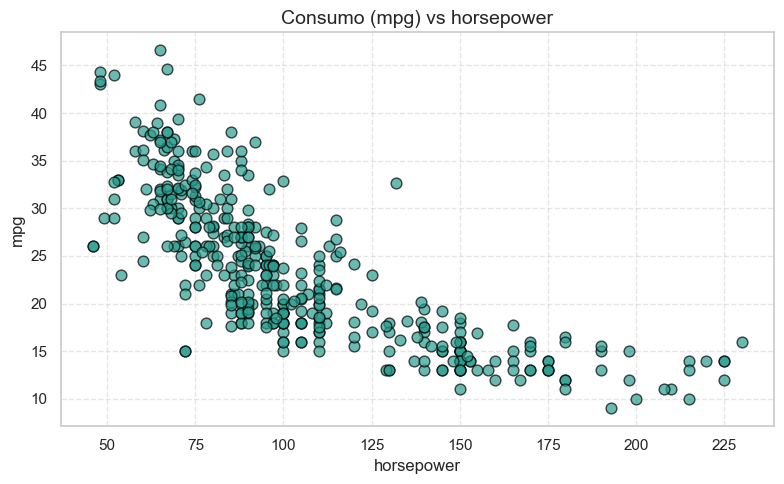

In [18]:
import matplotlib.pyplot as plt

def visualiza(X, y, nombre_columna):
    """
    Visualiza el target (mpg) frente a una variable específica.
    
    Parámetros:
    - X: DataFrame con las variables predictoras.
    - y: Serie o DataFrame con el target.
    - nombre_columna: Nombre de la variable a graficar.
    """
    plt.figure(figsize=(8, 5))

    # Gráfico de dispersión
    plt.scatter(X[nombre_columna], y, color="#2a9d8f", edgecolors='black', s=60, alpha=0.7)

    # Etiquetas y título
    plt.title(f"Consumo (mpg) vs {nombre_columna}", fontsize=14)
    plt.xlabel(nombre_columna, fontsize=12)
    plt.ylabel("mpg", fontsize=12)

    # Grilla
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()
    
visualiza(X, y, 'horsepower')

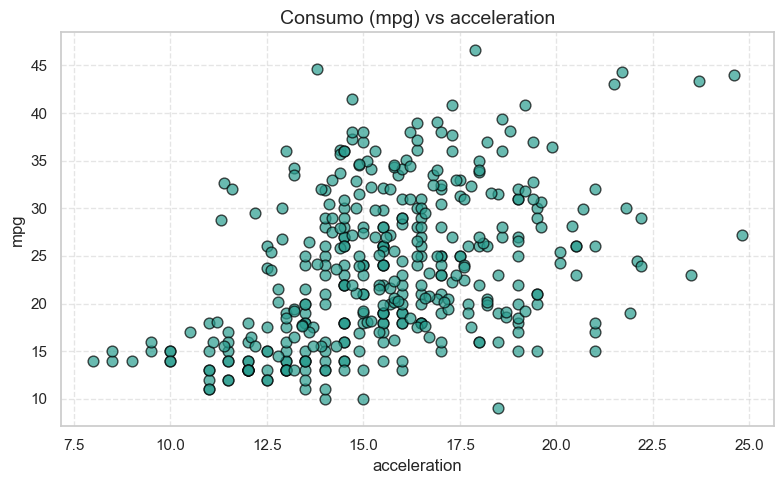

In [19]:
visualiza(X, y, 'acceleration')

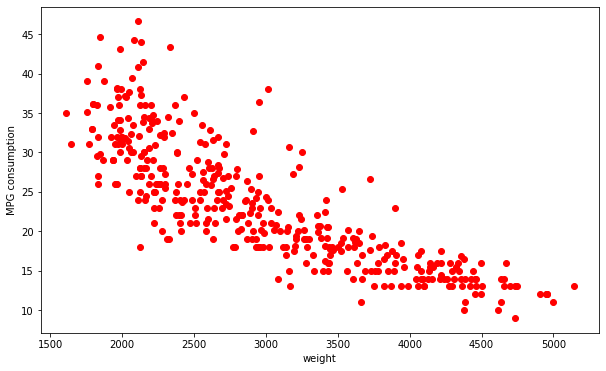

In [33]:
visualiza(X, y, 'weight')

IMPORTANTE: Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 1.2 Implementación del modelo

En este punto vamos a dar un paso atrás y olvidarnos de los datos de consumo por un momento, porque el algoritmo que vamos a implementar serviría para cualquier conjunto de datos.

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, queremos transponerlo antes de realizar las operaciones. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

In [35]:
import numpy as np

def pesos_ols(X, y):
    # Implementa la fórmula matricial
    """
    Calcula los pesos de la regresión lineal mediante la fórmula matricial:
    w = (XᵗX)⁻¹Xᵗy

    Si hay más columnas (features) que filas (observaciones), transpone X e y para poder garantizar los cálculos.

    Parámetros:
    X: array 2D de características
    y: array 1D o 2D del target

    Retorna:
    w: array 1D con los coeficientes (incluyendo el intercepto)
    """
    
    # TODO 1 Comprueba que las dimensiones son adecuadas y corrige si no es así
    X = np.array(X)
    y = np.array(y)

    print(f"Forma inicial de X: {X.shape}")
    print(f"Forma inicial de y: {y.shape}")


    if X.shape[1] > X.shape[0]:
        print("Transponiendo X e y para ajustar correctamente")
        X = X.T
        y = y.reshape(-1, 1)  # Asegurar que sea columna (n, 1)
    else:
        y = y.reshape(-1, 1)
   
    # TODO 2 Prepara la matriz X para que tenga la forma adecuada para aplicar la fórmula 

    X_ext = np.hstack((np.ones((X.shape[0], 1)), X))
    print(f"Forma de X extendida: {X_ext.shape}")
    print(f"Forma de y preparada: {y.shape}")


    # TODO 3 Calcula los pesos
    # Precomputar matrices para usar en ambos casos
    XtX = X_ext.T @ X_ext
    Xt_y = X_ext.T @ y

    try:
        XtX_inv = np.linalg.inv(XtX)
        print("XtX invertido correctamente")
    except np.linalg.LinAlgError:
        print("XtX no es invertible, usando pseudoinversa...")
        XtX_inv = np.linalg.pinv(XtX)

    w = XtX_inv @ Xt_y
    return w.flatten()


In [37]:
# Array de prueba!!
X = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X, y)

Forma inicial de X: (2, 10)
Forma inicial de y: (10,)
Transponiendo X e y para ajustar correctamente
Forma de X extendida: (10, 3)
Forma de y preparada: (10, 1)
XtX invertido correctamente


array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

Hemos implementado el algoritmo de mínimos cuadrados y lo hemos probado en un array de tamaño 2x10. Como pista, el resultado que he obtenido para este array de prueba es el siguiente:

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

### 1.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado, el de consumo de combustible. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

Forma inicial de X: (392, 1)
Forma inicial de y: (392,)
Forma de X extendida: (392, 2)
Forma de y preparada: (392, 1)
XtX invertido correctamente


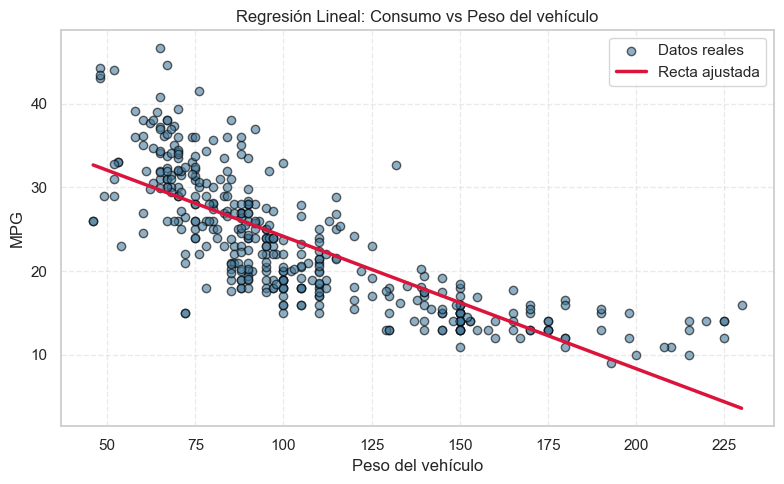

In [58]:
# TODO Aplica el modelo y dibuja la recta junto con los datos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar y limpiar el dataset
url = "https://archive.ics.uci.edu/static/public/9/data.csv"
df = pd.read_csv(url)
df['weight'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna(subset=['weight', 'mpg'])

# Convertir a arrays de numpy
X = df[['weight']].values  # shape: (n, 1)
y = df['mpg'].values           # shape: (n,)

# Calcular pesos usando la función
w = pesos_ols(X, y)  # → [intercepto, pendiente]

# Dibujar los datos + la recta de ajuste
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Datos reales", color="#457b9d", edgecolors="black", alpha=0.6)

# Para la recta: ordenar X para una línea suave
x_line = np.linspace(X.min(), X.max(), 100)
y_line = w[0] + w[1] * x_line

plt.plot(x_line, y_line, color="crimson", linewidth=2.5, label="Recta ajustada")
plt.xlabel("Peso del vehículo")
plt.ylabel("MPG")
plt.title("Regresión Lineal: Consumo vs Peso del vehículo")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()



Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [40]:
!pip install scikit-learn


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------------- -------------------------- 2.9/8.7 MB 14.2 MB/s eta 0:00:01
   ------------------------ --------------- 5.2/8.7 MB 12.8 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 13.9 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 13.2 MB/s eta 0:00:00

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

X_lr = X[['weight']]
y_lr = y

# Entrenamos con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]


**TODO**: Analiza el resultado obtenido y compáralo con el de sklearn

In [ ]:
# Los valores del intercepto y la pendiente son iguales entre la función definida y sklearn, lo que sígnifica que la implementación funcionó bien.
# Ambos demuestran la pendiente negativa lo que signig 

In [45]:

w_manual = pesos_ols(X_lr.values, y_lr)
print("Intercepto:", w_manual[0])
print("Pendiente:", w_manual[1])



Forma inicial de X: (398, 1)
Forma inicial de y: (398, 1)
Forma de X extendida: (398, 2)
Forma de y preparada: (398, 1)
XtX invertido correctamente
Intercepto: 46.31736442026576
Pendiente: -0.007676610063926494


### 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal



# Algunas de las principales diferencias, ventajas y desventajas entre un método y otro son:

Método de mínimos cuadrados (OLS)

- Es una buena solución para pocas variables, al ser análitica se debe tener cuidado en el procesamiento de las matrices del modelo, que se transpongan correctamente y demás me pareció un poco complejo y con varias reglas para programar (seguramente por mi nula experiencia y total desconocimiento previo de esto). En el caso que las matrices no sea invertibles este método puede fallar o requerise de más procesamientos adicionales para acondicionar las matrices, para mí, tiene más complejidades.
- Considero que una vez implementado correctamente puede generar resultados más exactos que el descenso del gradiente, pues este último al ser iterativo puede tener una menor precisión (diferencias númericas muy pequeñas).

Descenso del Gradiente:

- Es un método iterativo que puede trabajar con datasets grandes con varias dimensiones, no está sujeto a que las matrices sean invertibles. Me pareció más fácil de implementar, de manera general mucho más sencillo de implementar.
- Se puede ir adaptando en la medida que se definan adecuadamente la cantidad de iteraciones y el punto inicial desde el cual se empieza a iterar.

En este ejericio visualmente dieron la misma gráfica, se superponian las dos pendientes negativas (lo hice en un ejercicio comparativo afuera).



## 2. Optimización con descenso del gradiente

Vamos a resolver el mismo problema usando el descenso del gradiente en lugar de la solución analítica. El descenso del gradiente es un método de optimización iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cuándo tiene que parar y darnos la solución. En este caso, le vamos a decir que pare y nos devuelva la solución después de un número de iteraciones que le pasaremos como parámetro. La ecuación iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra función objetivo, y w es un vector. Para la función objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

TIP: Ten en cuenta que el RSS también lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones 
- El learning rate

La función nos devolverá un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo, a la que también se conoce como *loss function*.

In [46]:
import numpy as np

def gradient_descent(X, y, w0, n_iter, eta): 
    # Define la función que calcule n_iter iteraciones del descenso del gradiente
    # Inicializamos variables
    # Si eliges otra forma de resolverlo, puedes borrar esta parte
    loss_iter = [np.inf]
    w_iter = [w0]
    w = w0
    
    # TODO 1 Añade la columna de 1s

    X_aug = np.hstack((np.ones((X.shape[0], 1)), X))  # shape: (n, 2)
    
    # TODO 2 Haz un bucle para las iteraciones 
    # TODO 3 Dentro del bucle tendrás que actualizar el error y los pesos y añadirlos a las listas

    for _ in range(n_iter):
        # Predicción
        y_pred = X_aug @ w
        
        # Error
        error = y_pred - y

    # Cálculo del gradiente
        grad = 2 * X_aug.T @ error / X.shape[0]
        
        # Actualización de pesos
        w = w - eta * grad
        
        # Pérdida cuadrática
        loss = np.mean((y_pred - y)**2)
        
        # Almacenar resultados
        w_iter.append(w)
        loss_iter.append(loss)
    
    # Devuelve los resultados
    return np.array(w_iter), np.array(loss_iter)


eta = 0.01 
iteraciones = 2000 

np.random.seed(123)
w0 = np.random.rand(2).reshape((2,1))

y = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5,1))
X = np.array( [[  0.37020659],
               [  -0.48234664],
               [  0.51483616],
               [  0.38352774],
               [  1.29888065]])

weights, loss = gradient_descent(X, y, w0, iteraciones, eta)

print(weights[-1])

[[183844.99464097]
 [ 40417.13664575]]


### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [47]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)

(398, 1)
(398, 1)


Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

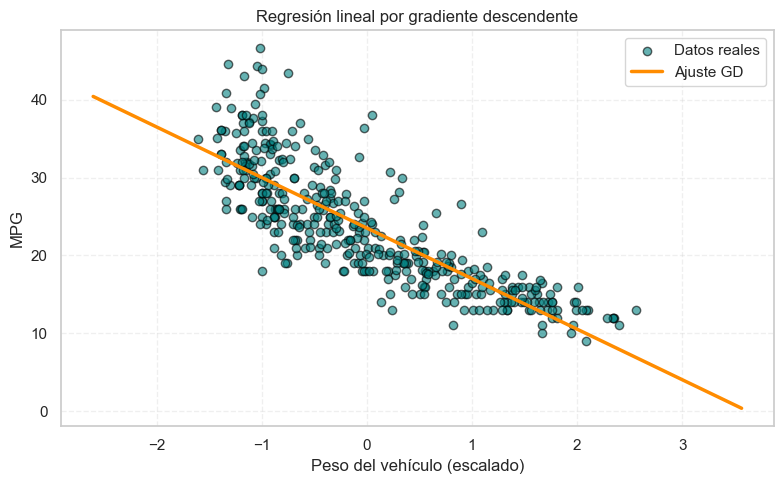

In [48]:
# TODO Aplica el modelo y dibuja la recta junto con los datos

X = auto_mpg.data.features
y = auto_mpg.data.targets

# Escalamos la variable x 

X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

X_gd=(X_np - X_np.mean()) / X_np.std()
y_gd = y_np

# TODO 1 Punto inicial y learning rate
np.random.seed(42)
w0 = np.random.rand(2, 1)  # Coeficiente inicial (intercepto y pendiente)
eta = 0.01                 # Learning rate

# TODO 2 Aplicamos el algoritmo

# Suponiendo que gradient_descent(X, y, w0, iteraciones, eta) ya está definida
iteraciones = 2000
weights, losses = gradient_descent(X_gd, y_gd.reshape(-1, 1), w0, iteraciones, eta)
w_final = weights[-1]


# Límites de los ejes
x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) -1


# TODO 3 Dibuja la gráfica

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(X_gd, y_gd, color="teal", edgecolor="black", alpha=0.6, label="Datos reales")

# Recta de regresión
x_vals = np.linspace(x_min, x_max, 100).reshape(-1, 1)
y_vals = w_final[0] + w_final[1] * x_vals

plt.plot(x_vals, y_vals, color="darkorange", linewidth=2.5, label="Ajuste GD")
plt.title("Regresión lineal por gradiente descendente")
plt.xlabel("Peso del vehículo (escalado)")
plt.ylabel("MPG")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()